# Introducción a Métodos Monte-Carlo

## Primer método de Monte-Carlo: Hit and Miss

Un ejemplo mundano para explicar el método MonteCarlo:
        Queremos medir el área del círculo unitario, por los que lanzamos $N$ números aleatorios en el cuadrado que encierra al círculo unitario con área conocida $A$. Si tiramos $N$ números aleaotoriamente dentro del cuadrado, eventualmente $N_{in}$ caerán dentro del círculo unitario. Entonces el área del círculo será
            $$A_{circulo}=\frac{N_{in}}{N}A$$


Ejemplo. Cálculamos el área de un círculo de radio 1, con 1000 puntos aleatorios dentro de un cuadrado de lado 2 área del  plano cartesiano

In [46]:
import random as r
import math as m

n_in = 0
n = 1000000
for i in range(0, n):
    x2 = r.random()**2
    y2 = r.random()**2
    if m.sqrt(x2 + y2) < 1.0:
        n_in += 1
L_cuadrado=2
area = (n_in) / float(n)*L_cuadrado**2

print(area)

3.140652


Haremos una funcion Monte Carlo que aproximará pi

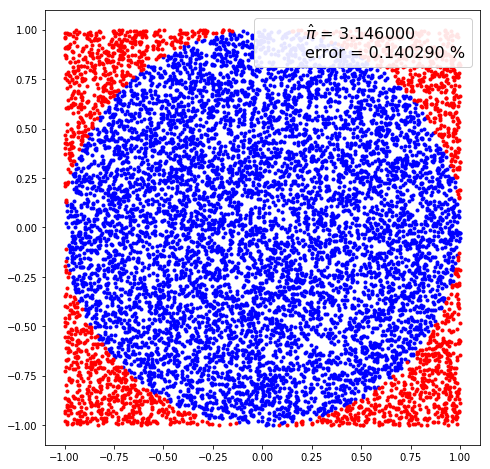

In [22]:
from pylab import *
def mc_pi_aprox(N=10000):
    figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    #np.random.uniform regresa un arreglo de 2 renglones, N columnas con numeros
    #aleatorios uniformes entre -1 y 1 (nos da cosas flotantes)
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / np.pi) * 100
    exterior = np.invert(interior)
    plot(x[interior], y[interior], 'b.')
    plot(x[exterior], y[exterior], 'r.')
    plot(0, 0, label='$\hat \pi$ = %f\nerror = %f %%'%(pi,error), alpha=0)
    axis('square')
    legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

Este es un método muy rebuscado de encontrar Pi, pero funciona para cualquier función.

El método queda definido como:
Integración Simple de Monte Carlo
Más general, supóngamos un rectángulo de altura $H$ en un intervalo de integración $[a,b]$, tal que la función $f(x)$ coincide con el rectángulo en las fronteras. Cálcula $n$ pares de números random $(x_i,y_i)$ tal que estén uniformemente distribuidos dentro del rectángulo. La fracción de puntos que caen en el área contenida dentro de $f(x)$, *i. e.*, que satisface $y_i \leq f(x_i)$ es un estimado del radio de la integral de $f(x)$ y del área del rectángulo. Entonces, la estimación de la integral queda: $$I(N) = \int _a^b{f(x)dx} \simeq  \frac{N_{in}}{N}H(b-a).
$$

Evaluaremos la integral $$ I=\int_0^2\sin^2\left[ \frac{1}{x(2-x)} \right]dx$$ usando 10 000 puntos. De [0 a 2]. El área donde pondremos los tiros es un cuadrado A=(b-a)*1 (lado 1)

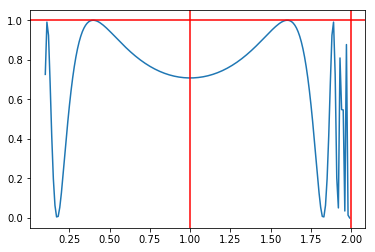

In [4]:
#Grafiquemos la función a integrar
from pylab import *
f=lambda x: sin(1/(x*(2-x)))**2
xs = [i for i in arange(0.1,2,0.01)]
ys = [f(x) for x in xs]
plot(xs,ys)
axvline(x=1,color='r')
axvline(x=2,color='r')
axhline(y=1,color='r')
show()

Para esto, tenemos que hacer una función aleatoria que tenga valores en x entre 1 y 2 y valores aleatorios entre 0 y 1

In [52]:
from pylab import *
from math import *
from random import *

f=lambda x: sin(1/(x*(2-x)))**2

a = 0
b = 2
A = (b-a)*1

n_in = 0
n = 10000000
for i in range(0,n):
    x2=uniform(0,2)
    y2=uniform(0,1)
    if f(x2) >= y2:
        n_in += 1
area = ((n_in)*A) / float(n)
print(area)

1.4516638


Ahora, generalizaremos para un cuadrado dado por el usuario.

In [56]:
from pylab import *
from math import *
from random import *

f=lambda x: sin(1/(x*(2-x)))**2

def Hit_miss(f,x_i,x_f,y_i,y_f,N):
    A=abs(x_f-x_i)*abs(y_f-y_i)
    n_in = 0
    for i in range(0,n):
        x2 =uniform(x_i,x_f)
        y2 =uniform(y_i,y_f)
        if f(x2) >= y2:
            n_in += 1
    area = ((n_in)*A) / float(n)
    return area
print(Hit_miss(f,0.,2.,0.,1.,100))

1.4515822


¿Qué observas con el área prueba y con el número de tiros?

## Método "Crudo" de MonteCarlo

Otra definición de Monte Carlo se basa en la definición: $$\langle f \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.$$ Para determinar este promedio, simplemente probamos el valor de $f(x)$: $$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ donde los valores de $N$ y $x_i$ están distribuidos uniformemente en un intervalo $[a,b]$. La integral estará dada por $$I(N)=(b-a) \langle f \rangle .$$

Por cálculo 2, el promedio de una función en el intervalo [a,b] está dado por $$f_{avg}=\frac{1}{b-a}\int_a^b f(x) dx$$
(Teorema del límite Central)

Con esto, en lugar de evaluar una integral indefinida, evaluaremos el promedio de la función.

Esto es a lo que llaman el método de Monte Carlo crudo. Haremos la integral de $$\int_0^{\infty}\frac{e^{-x}}{1+(x-1)^2}dx$$

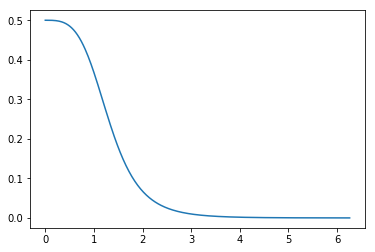

In [62]:
from random import *
from pylab import *
from math import *

def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)

xs = [float(i/50) for i in range(int(50*pi*2))]
ys = [f(x) for x in xs]
#print(50*pi*2)
plot(xs,ys)

def monte_carlo_crudo(f,minimo,maximo,muestras=5000):
    s = 0
    for i in range(muestras):
        x = uniform(minimo, maximo)
        s += f(x)
    
    return (maximo - minimo) * float(s/muestras)


In [63]:
from numpy import *

def trapecio(f,a,b,N):
    h=(b-a)/N
    s=0  #s=0.5*f(a)+0.5*f(b) metemos esto en el for
    for k in range(1,N//2+1):
        s+=f(a+(2*k-1)*h)
    return s*h

def simpson(f, a, b, n):
    h=(b-a)/n
    s=0.0
    x=a + h
    for i in range(1,n,2):
        s += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(2,n,2):
        s += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+s)

def Romberg(f,a,b,epsilon=1e-6):
    I = (b-a)/2*(f(b)+f(a)) #primer termino es trapecio R1,1
    eps=1
    N=1
    R =zeros((100,100)) 
    R[0,0]=I
    i=0
    while eps>epsilon:
        N*=2 #incremento por 2 el tamaño de pasos
        i+=1
        R[i,0] = R[i-1,0]/2 + trapecio(f,a,b,N)
        for m in range(i):
            R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
            eps = abs(R[i,m+1]-R[i-1,m]) #error
    I= R[i,m+1]
    return I

In [65]:
#Valor real de la integral 0.696092
print('trapecio',trapecio(f,0,5,1000))
print('simpson',simpson(f,0,5,1000))
print('romberg',Romberg(f,0,5,1e-3))
print('montecarlo hit and miss',Hit_miss(f,0,5,0,0.5,100))
print('montecarlo crudo',monte_carlo_crudo(f,0,5,1000)) #varia el resultado con los pasos aleatorios

trapecio 0.3479054782377319
simpson 0.6958109540425237
romberg 0.6958128263056385
montecarlo hit and miss 0.69551925
montecarlo crudo 0.6768804756642341
